In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2 as cv
import numpy as np

from utils.io_utils import get_images, save_intrinsics_calib
from utils.calib_utils import detect_keypoints, undistort_intrinsics, undistort_images
from utils.vis_utils import plot_figures, draw_chessboard_corners
from utils.common_utils import filter_orientation, prepare_calib_input

WARNING - 2021-04-05 20:14:46,245 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-04-05 20:14:46,246 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-04-05 20:14:46,247 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
WARNING - 2021-04-05 20:14:46,248 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
T

### Load images

In [3]:
data_path = "/home/konstantin/datasets/bandeja-sequence/opencv_camera_calibration_samsung/man_wide_20210225_170858"

In [4]:
images = get_images(data_path)

In [5]:
len(images)

91

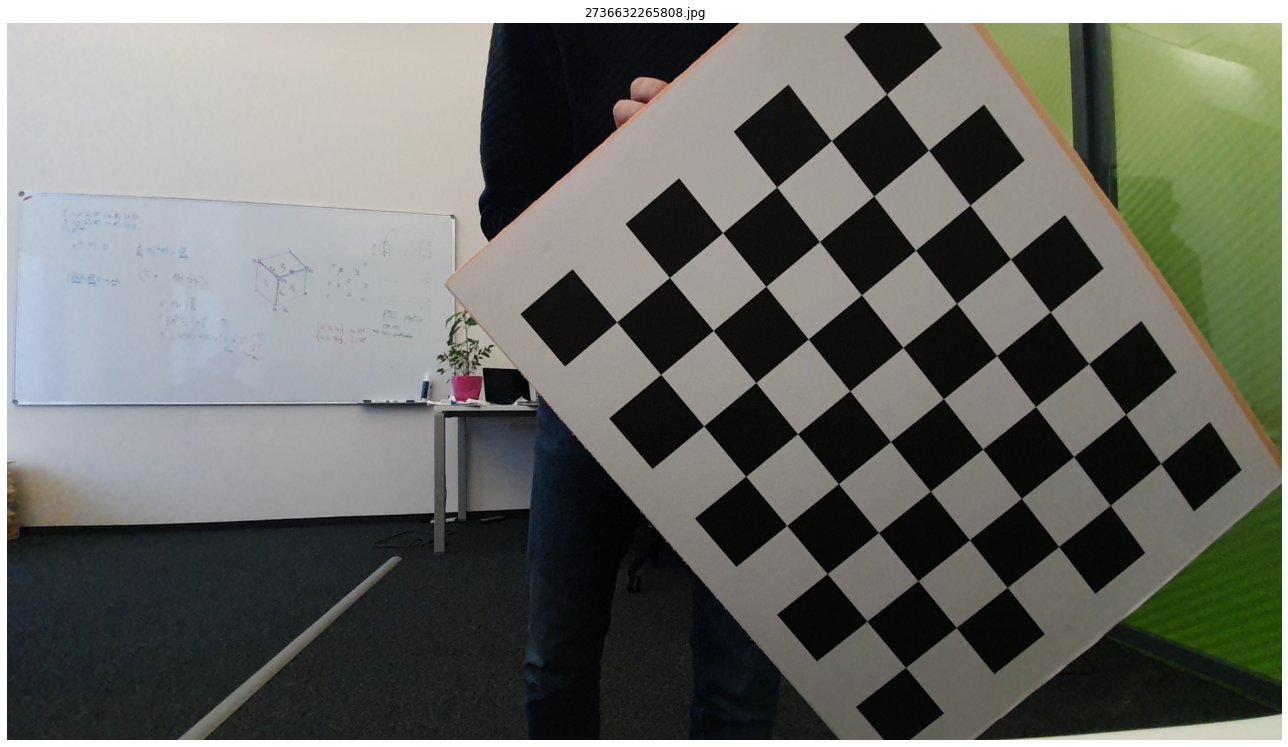

In [7]:
idx = np.random.randint(0, len(images))

check_key = list(images.keys())[idx]

plot_figures({check_key: images[check_key]})

### Detect keypoints


In [8]:
pattern_size = (8, 6)
edge_length = 0.05

In [9]:
detections = detect_keypoints(images, pattern_size, edge_length)

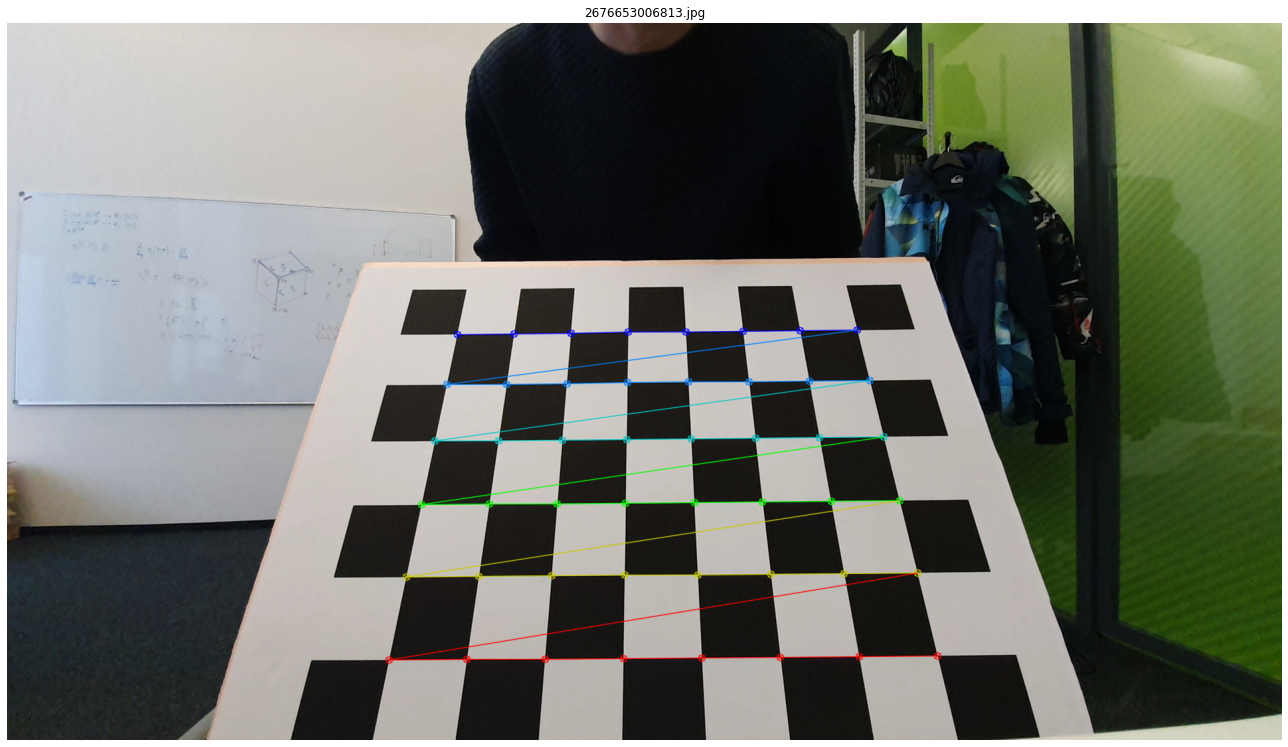

In [11]:
idx = 13

check_key = list(images.keys())[idx]

plot_figures({check_key: draw_chessboard_corners(images[check_key], detections[check_key][1], pattern_size)})

### Calibrate intrinsics

In [12]:
# Orientation of the detected pattern of different images may be different. Use one image as anchor and leave only 
# those that have the same orientation

f_detections = filter_orientation(detections, pattern_size, anchor_index=0)

In [13]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.0001)

scene_points, kp, shape = prepare_calib_input(images, detections, detections.keys())

In [14]:
reproj_error, intrinsics, dist_coeff, _, _ = cv.calibrateCamera(scene_points, kp, shape, None, None, flags=cv.CALIB_RATIONAL_MODEL + cv.CALIB_THIN_PRISM_MODEL + cv.CALIB_TILTED_MODEL, criteria=criteria)

print(reproj_error)

0.6657123649675449


### Visualize calibration results

In [15]:
undist_intrinsics = undistort_intrinsics(shape, intrinsics, dist_coeff)

In [16]:
print("Intrinsics:")
print(intrinsics, end='\n\n')

print("Distortion coefficients:")
print(dist_coeff, end='\n\n')

print("Undistored intrinsics: ")
print(undist_intrinsics)

Intrinsics:
[[763.25525907   0.         963.90338443]
 [  0.         765.43850815 539.58969115]
 [  0.           0.           1.        ]]

Distortion coefficients:
[[ 1.91340943e+01 -1.30943791e+01  8.16611770e-03  1.16382630e-02
   5.34310918e+00  1.94005262e+01 -1.34725982e+01  5.67043975e+00
  -1.05188492e-02 -1.07783803e-03 -8.04811429e-03  1.46026566e-05
  -2.83022896e-02  3.02638369e-02]]

Undistored intrinsics: 
[[710.37042236   0.         954.90228869]
 [  0.         713.72161865 535.60338075]
 [  0.           0.           1.        ]]


In [18]:
undist_images = undistort_images(images, intrinsics, dist_coeff, undist_intrinsics, cv.INTER_LINEAR)

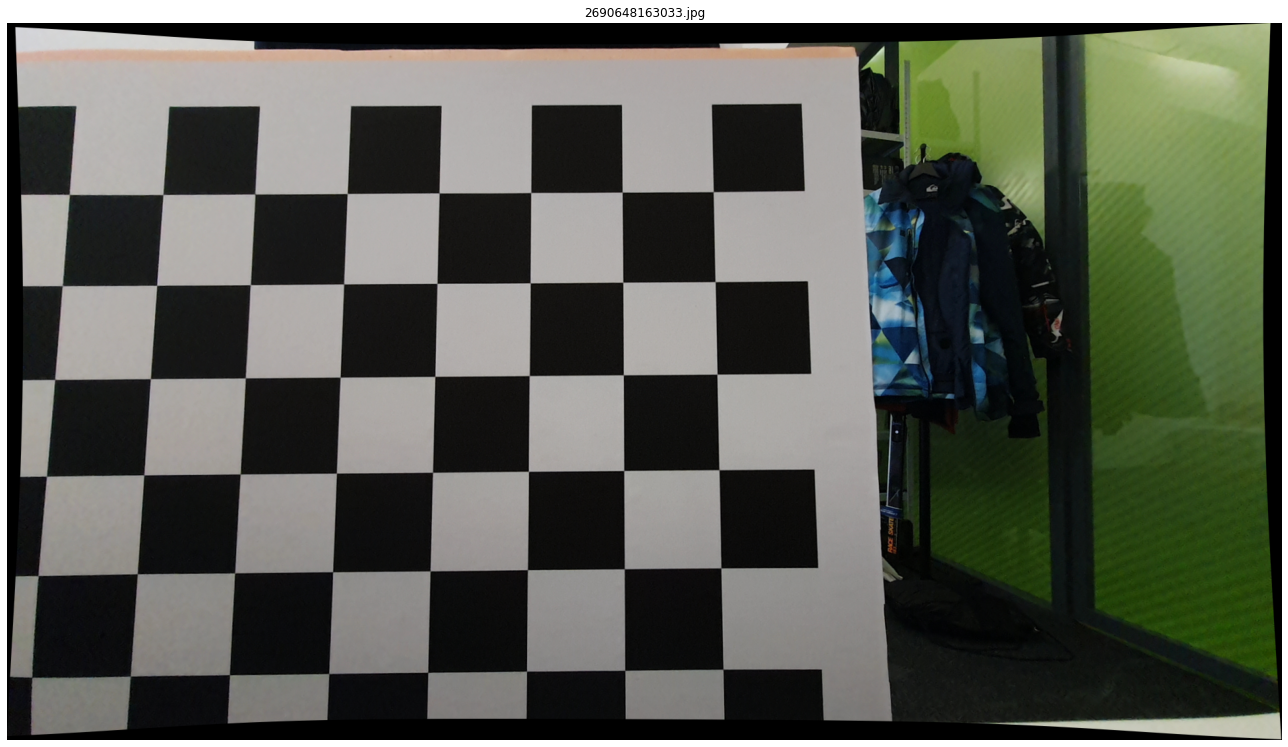

In [19]:
idx = 20

check_key = list(images.keys())[idx]

plot_figures({check_key: undist_images[check_key]})

In [20]:
calib_name = 's10_wide'
save_intrinsics_calib(calib_name, intrinsics, dist_coeff, undist_intrinsics)

Saved calibration results as calib_output/s10_wide_intrinsics.npy
